In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df=pd.read_csv("Customer Churn.csv")


In [262]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [264]:
# replacing blanks in total charges with 0 as tenure is 0 so no total charges are recorded

In [266]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

In [268]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [272]:
# isnull is used for checking any null value in dataset if yes it will-> True and if not-> False

In [274]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [276]:
df.isnull().sum().sum()

0

In [278]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [280]:
df.duplicated().sum()

0

In [282]:
df["customerID"].duplicated().sum()

0

In [284]:
def conv(value):
    if(value == 1):
        return"yes"
    else:
        return("No")

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [286]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [288]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


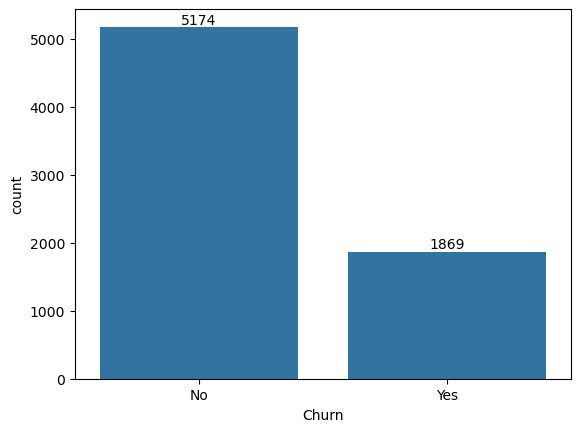

In [290]:
ax = sns.countplot(x = 'Churn',data = df) #ax.bar use kra yh cotainer ke top pr result btata
ax.bar_label(ax.containers[0]) # This labels the bars in the first container
plt.show()

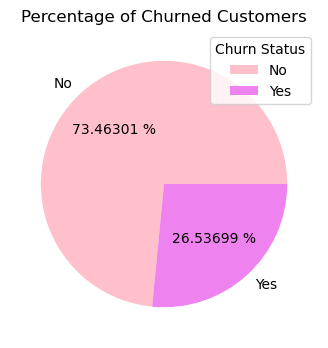

In [292]:
plt.figure(figsize =(4,4))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.5f %%",colors=['pink', 'violet'])
plt.title("Percentage of Churned Customers", fontsize =12)
plt.legend(gb.index, title="Churn Status", loc="upper right")
plt.show()

In [294]:
# from the given pie chart we can conclude that 26.53% of our customers have churned out

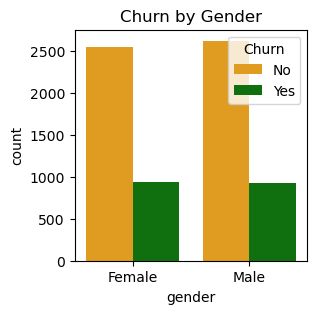

In [296]:
plt.figure(figsize = (3,3))
sns.countplot(x ='gender', data=df, hue='Churn',palette=['orange', 'green'])
plt.title("Churn by Gender")
plt.show()

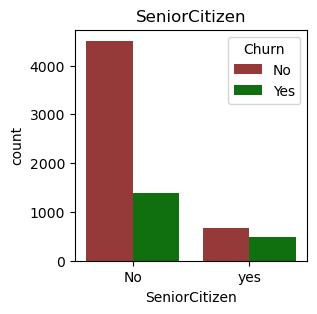

In [308]:
plt.figure(figsize = (3,3))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn" , palette = ["brown","green"])
plt.title("SeniorCitizen")
plt.show()

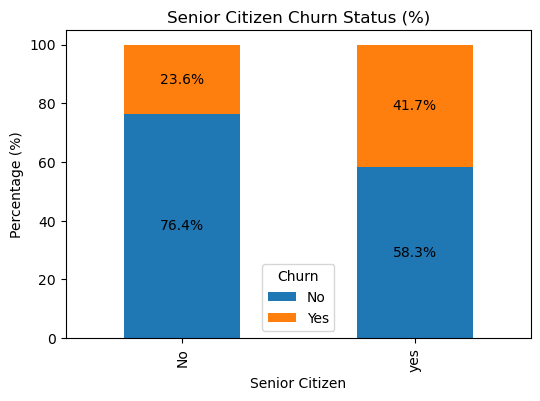

In [332]:
# Group by 'SeniorCitizen' and 'Churn' to get counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate total counts for normalization
total_counts = counts.sum(axis=1)

# Calculate percentages
percentages = counts.div(total_counts, axis=0) * 100

# Plotting
ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 4))

# Add title and labels
plt.title("Senior Citizen Churn Status (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")

# Add percentage labels on top of each segment
for i in ax.containers:
    ax.bar_label(i, label_type='center', fmt='%.1f%%')

# Show the plot
plt.show()

fmt='%.1f%%'
%.1f:

The % indicates that we are formatting a value.
.1 specifies that we want one digit after the decimal point.
f means that we are formatting a floating-point number. 
So, for example, a value of 75.123 would be displayed as 75.1.
%%:

The double %% is used to include a literal percent sign (%) in the output. 
Since % is a special character in formatting strings (it denotes the start of a format specifier),
you use %% to display a single %.

#comparatively a greater percentage of people in senior citizen category have churned

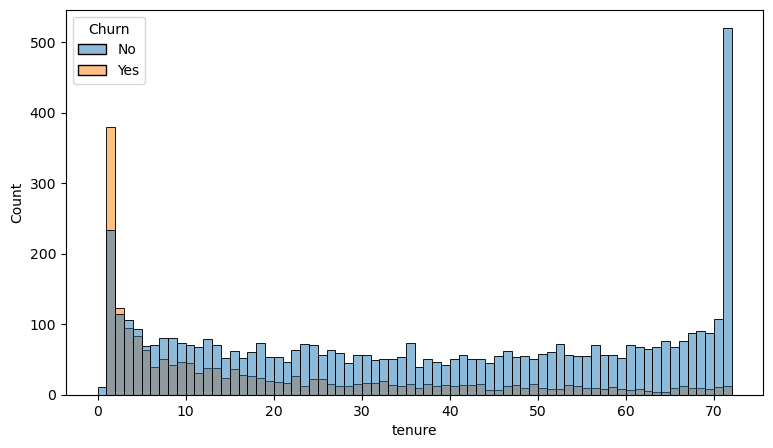

In [374]:
plt.figure(figsize =(9,5))
sns.histplot(x = "tenure", data = df , bins = 72,hue ="Churn")
plt.show()

## people who have used our services for a long time have stayed and people who have used our sevices

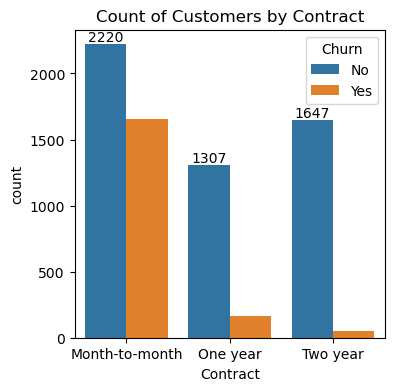

In [391]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract',data = df,hue = "Churn") #ax.bar use kra yh cotainer ke top pr result btata
ax.bar_label(ax.containers[0])# This labels the bars in the first container
plt.title("Count of Customers by Contract")
plt.show()

In [ ]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [403]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

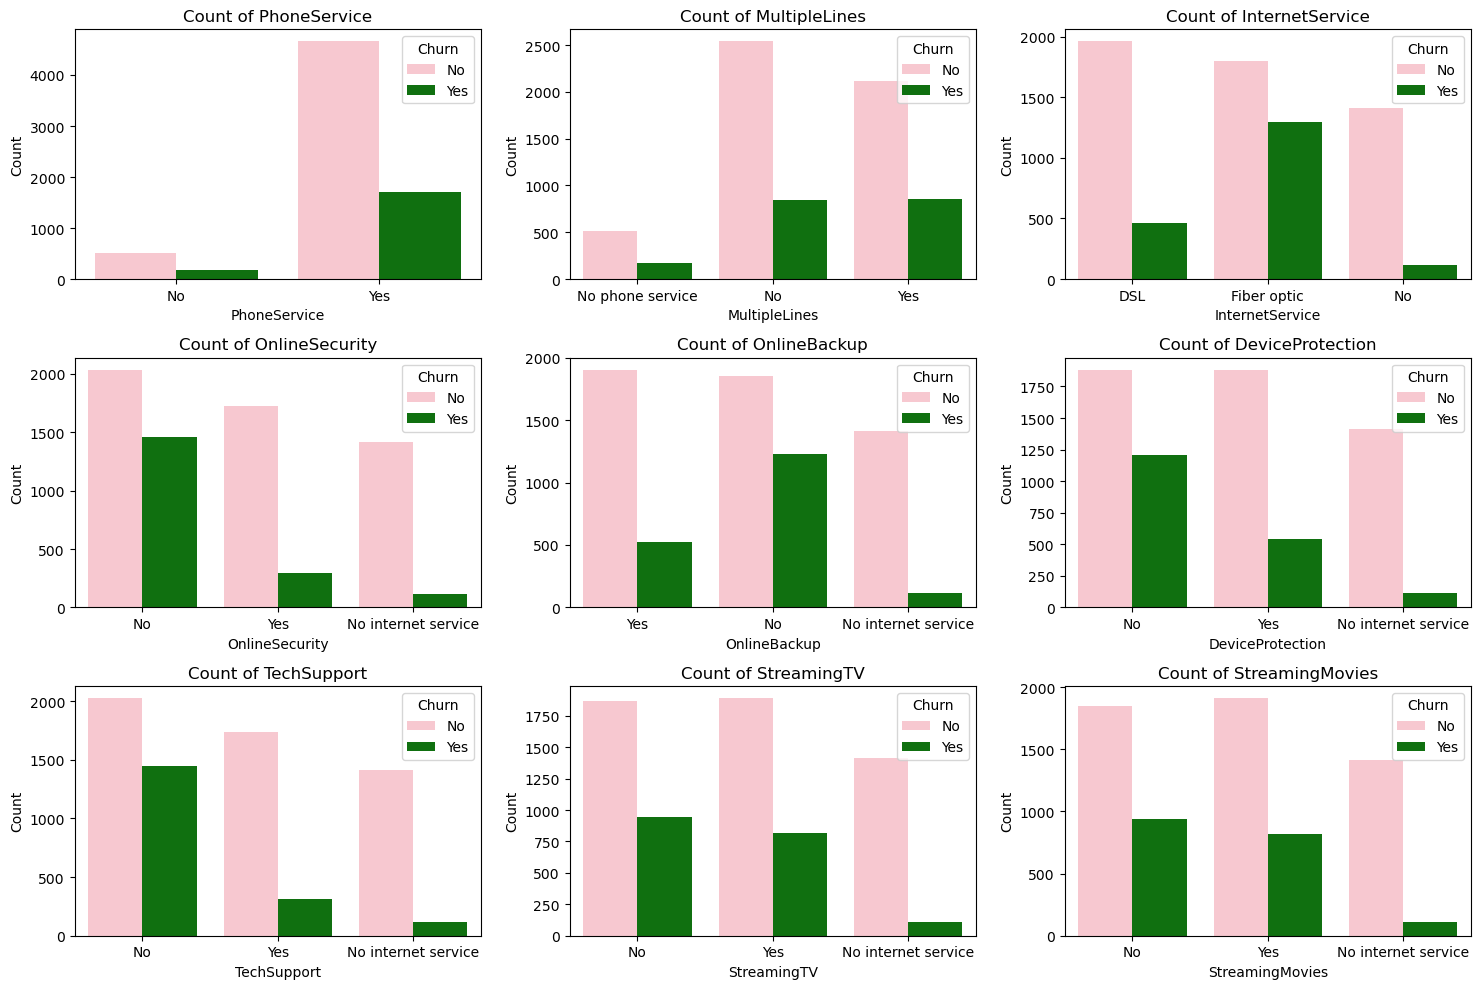

In [409]:

# List of features to plot
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set the number of rows and columns for the subplots
n_rows = 3  # Adjust based on the number of features
n_cols = 3

plt.figure(figsize=(15, 10))  # Adjust figure size for clarity

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=feature, data=df, hue='Churn', palette=["pink", "green"])
    plt.title(f"Count of {feature}")  # Updated title
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()


#The charts display counts of customer churn (yes/no) across various services such as PhoneService, MultipleLines, InternetService, OnlineSecurity, and others. In general, customers with no additional services like OnlineSecurity, OnlineBackup, and TechSupport have higher churn rates, while those with these services tend to churn less. Fiber optic InternetService has a notably higher churn rate compared to DSL or no internet service.

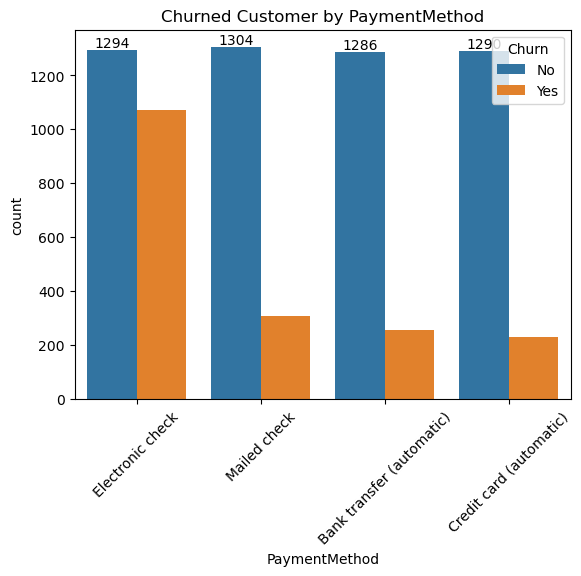

In [437]:
ax = sns.countplot(x = 'PaymentMethod',data = df , hue = "Churn") #ax.bar use kra yh cotainer ke top pr result btata
ax.bar_label(ax.containers[0]) # This labels the bars in the first container
#ax.bar_label(ax.containers[1])
plt.title("Churned Customer by PaymentMethod")
plt.xticks(rotation=45)
plt.show()

# customer is likely to churn when he is using electronic check as a payment method.